# Bank Churn Prediction - Data Exploration
## Exploratory Data Analysis of Synthetic Banking Data

In [ ]:
pip install notebook ipykernel

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

In [3]:
# Load the synthetic data
df = pd.read_csv('../data/raw/synthetic_customers.csv')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (10000, 54)


,customer_id,age,income,region,occupation_type,customer_since,account_type,total_transactions,login_frequency,app_usage_minutes,...,credit_score,credit_utilization,num_loan_defaults,debt_to_income,credit_inquiry_count,promotions_sent,promotion_response_rate,reward_points,churn_probability,churn_risk
0,CUST_000000,56,46244.137771,Hyderabad,Professional,2022-09-26 01:21:56.083228,Recurring Deposit,18,10.799403,32.276865,...,756.133902,0.455398,0,0.109028,0,2,0.171842,1044,0.109892,0
1,CUST_000001,78,72885.826811,Ahmedabad,Service,2017-04-08 01:21:56.083228,Current Account,11,22.391233,76.227872,...,801.525700,0.738574,0,0.364695,0,9,0.134045,958,0.126283,0
2,CUST_000002,56,37079.328905,Hyderabad,Student,2021-09-04 01:21:56.083228,Salary Account,13,23.508401,44.920912,...,566.665762,0.137311,0,0.359064,1,4,0.146642,1038,0.100131,0
3,CUST_000003,41,56896.320493,Vadodara,Retired,2016-04-21 01:21:56.083228,Savings Account,15,4.694780,37.358853,...,609.271760,0.360872,0,0.103007,0,3,0.202491,999,0.110918,0
4,CUST_000004,53,69814.493760,Mumbai,Professional,2016-06-24 01:21:56.083228,Fixed Deposit,11,4.581239,34.443669,...,734.565314,0.060048,0,0.048732,1,5,0.167397,1009,0.142037,1


In [4]:
# Basic information
print("=== DATASET OVERVIEW ===")
print(f"Total customers: {len(df):,}")
print(f"Total features: {len(df.columns)}")
print(f"Churn rate: {df['churn_risk'].mean():.2%}")
print(f"\nData types:")
print(df.dtypes.value_counts())

=== DATASET OVERVIEW ===
Total customers: 10,000
Total features: 54
Churn rate: 12.00%

Data types:
float64    25
int64      19
object     10
Name: count, dtype: int64


In [5]:
# Feature categories breakdown
feature_categories = {
    'Demographics': [col for col in df.columns if any(x in col for x in ['age', 'income', 'region', 'occupation', 'education', 'marital', 'family'])],
    'Engagement': [col for col in df.columns if any(x in col for x in ['transaction', 'login', 'activity', 'usage', 'calls', 'frequency'])],
    'Fees': [col for col in df.columns if any(x in col for x in ['fee', 'overdraft', 'penalty', 'charge'])],
    'Service': [col for col in df.columns if any(x in col for x in ['complaint', 'satisfaction', 'service', 'resolution', 'escalation'])],
    'Products': [col for col in df.columns if any(x in col for x in ['product', 'credit_card', 'mortgage', 'investment', 'insurance'])],
    'Tenure': [col for col in df.columns if any(x in col for x in ['tenure', 'customer_since', 'new_customer', 'segment'])],
    'Balance': [col for col in df.columns if any(x in col for x in ['balance', 'salary', 'volatility', 'withdrawal'])],
    'Credit': [col for col in df.columns if any(x in col for x in ['credit', 'debt', 'loan', 'inquiry', 'default'])],
    'Personalization': [col for col in df.columns if any(x in col for x in ['promotion', 'reward', 'offer', 'personalized', 'relevance'])],
    'Contract': [col for col in df.columns if any(x in col for x in ['account_age', 'maturity', 'renewal', 'closure', 'status'])]
}

print("=== FEATURE CATEGORIES ===")
for category, features in feature_categories.items():
    print(f"{category}: {len(features)} features")

=== FEATURE CATEGORIES ===
Demographics: 12 features
Engagement: 7 features
Fees: 5 features
Service: 6 features
Products: 6 features
Tenure: 4 features
Balance: 7 features
Credit: 6 features
Personalization: 3 features
Contract: 1 features


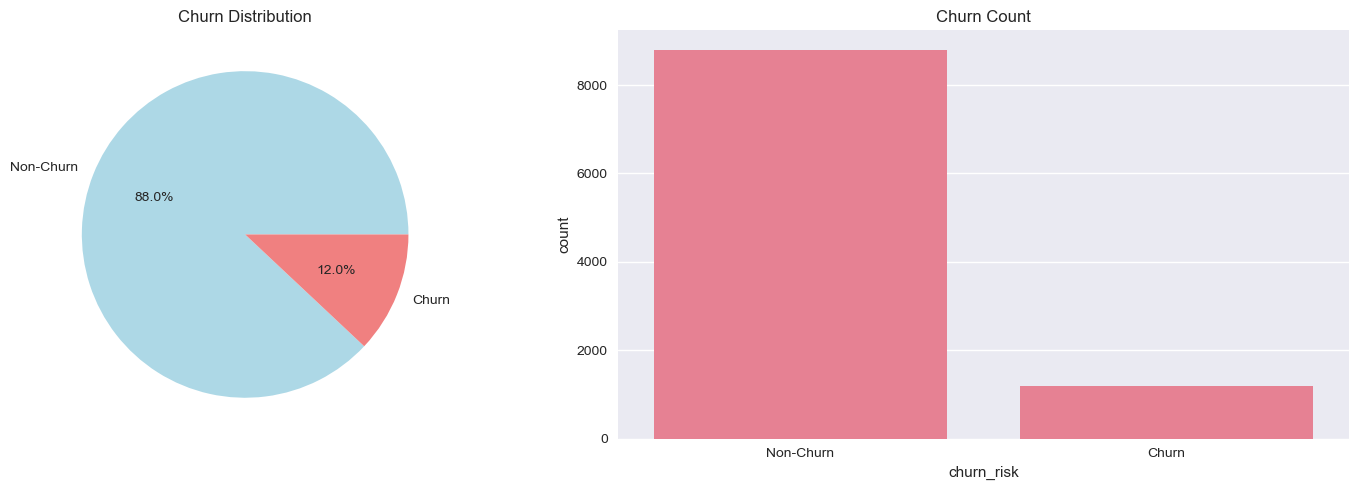

In [6]:
# Churn distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Pie chart
churn_counts = df['churn_risk'].value_counts()
axes[0].pie(churn_counts, labels=['Non-Churn', 'Churn'], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
axes[0].set_title('Churn Distribution')

# Bar plot
sns.countplot(data=df, x='churn_risk', ax=axes[1])
axes[1].set_title('Churn Count')
axes[1].set_xticklabels(['Non-Churn', 'Churn'])

plt.tight_layout()
plt.show()

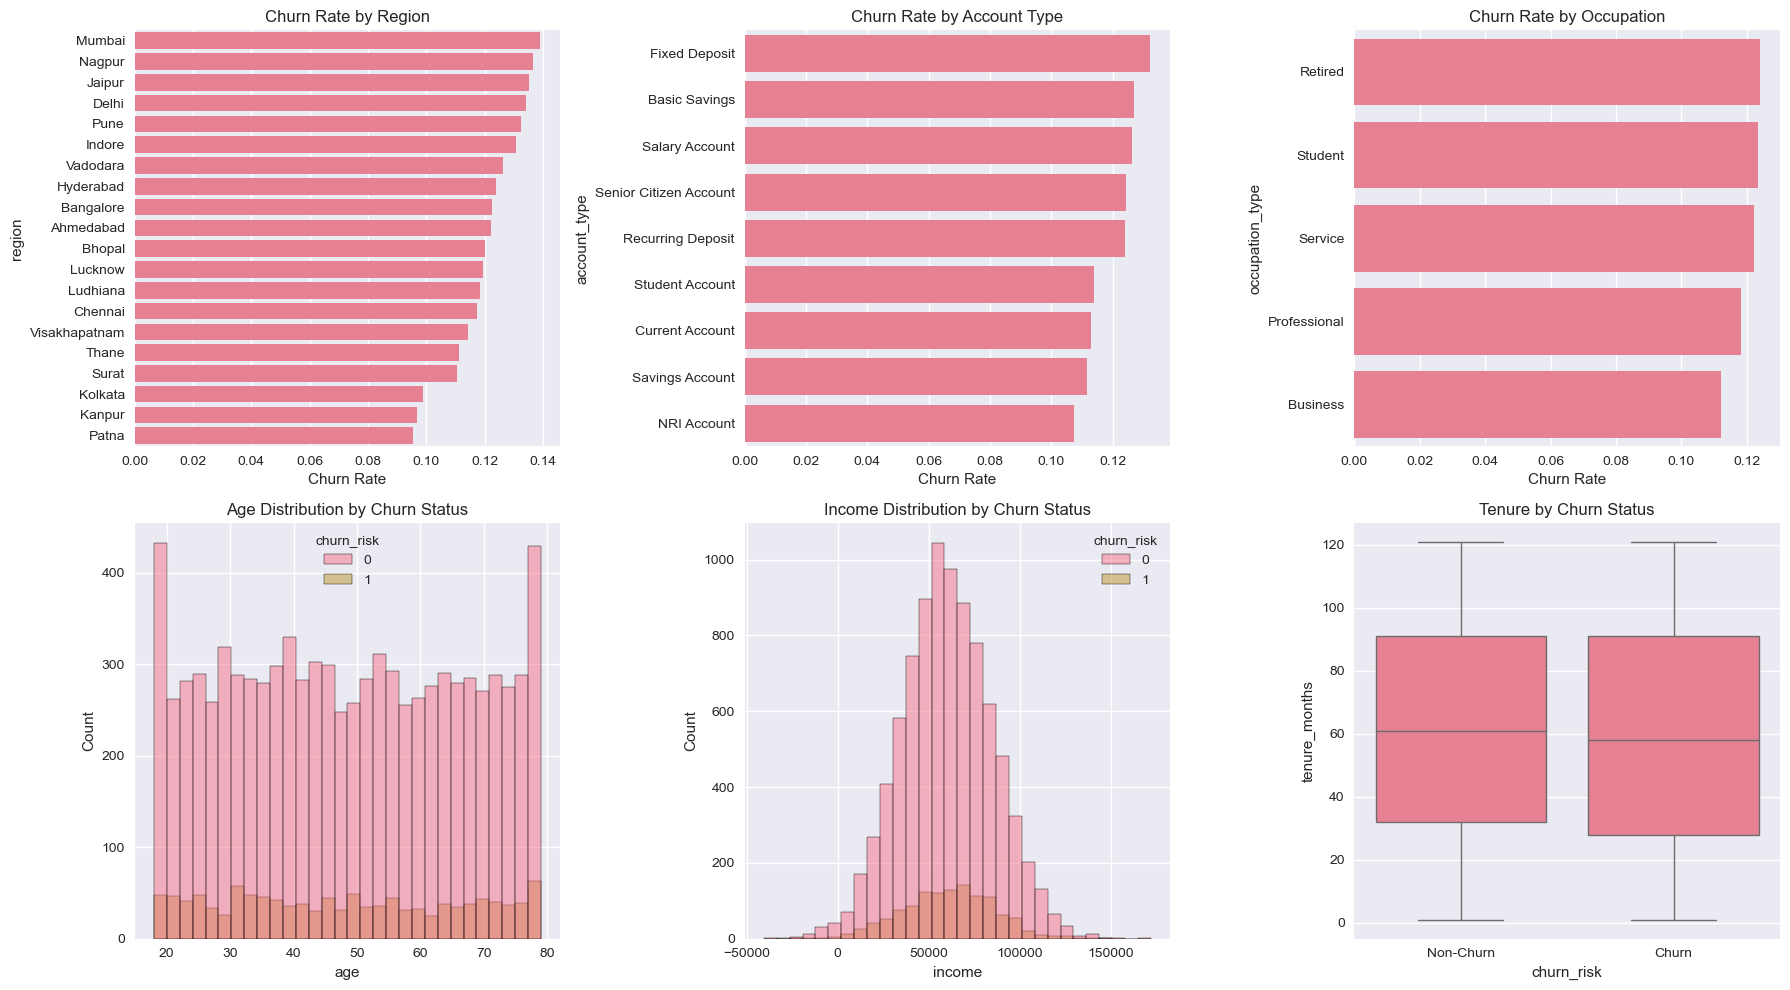

In [7]:
# Churn by demographic factors
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Region
region_churn = df.groupby('region')['churn_risk'].mean().sort_values(ascending=False)
sns.barplot(x=region_churn.values, y=region_churn.index, ax=axes[0,0])
axes[0,0].set_title('Churn Rate by Region')
axes[0,0].set_xlabel('Churn Rate')

# Account Type
account_churn = df.groupby('account_type')['churn_risk'].mean().sort_values(ascending=False)
sns.barplot(x=account_churn.values, y=account_churn.index, ax=axes[0,1])
axes[0,1].set_title('Churn Rate by Account Type')
axes[0,1].set_xlabel('Churn Rate')

# Occupation
occupation_churn = df.groupby('occupation_type')['churn_risk'].mean().sort_values(ascending=False)
sns.barplot(x=occupation_churn.values, y=occupation_churn.index, ax=axes[0,2])
axes[0,2].set_title('Churn Rate by Occupation')
axes[0,2].set_xlabel('Churn Rate')

# Age distribution by churn
sns.histplot(data=df, x='age', hue='churn_risk', bins=30, ax=axes[1,0])
axes[1,0].set_title('Age Distribution by Churn Status')

# Income distribution by churn
sns.histplot(data=df, x='income', hue='churn_risk', bins=30, ax=axes[1,1])
axes[1,1].set_title('Income Distribution by Churn Status')

# Tenure by churn
sns.boxplot(data=df, x='churn_risk', y='tenure_months', ax=axes[1,2])
axes[1,2].set_title('Tenure by Churn Status')
axes[1,2].set_xticklabels(['Non-Churn', 'Churn'])

plt.tight_layout()
plt.show()

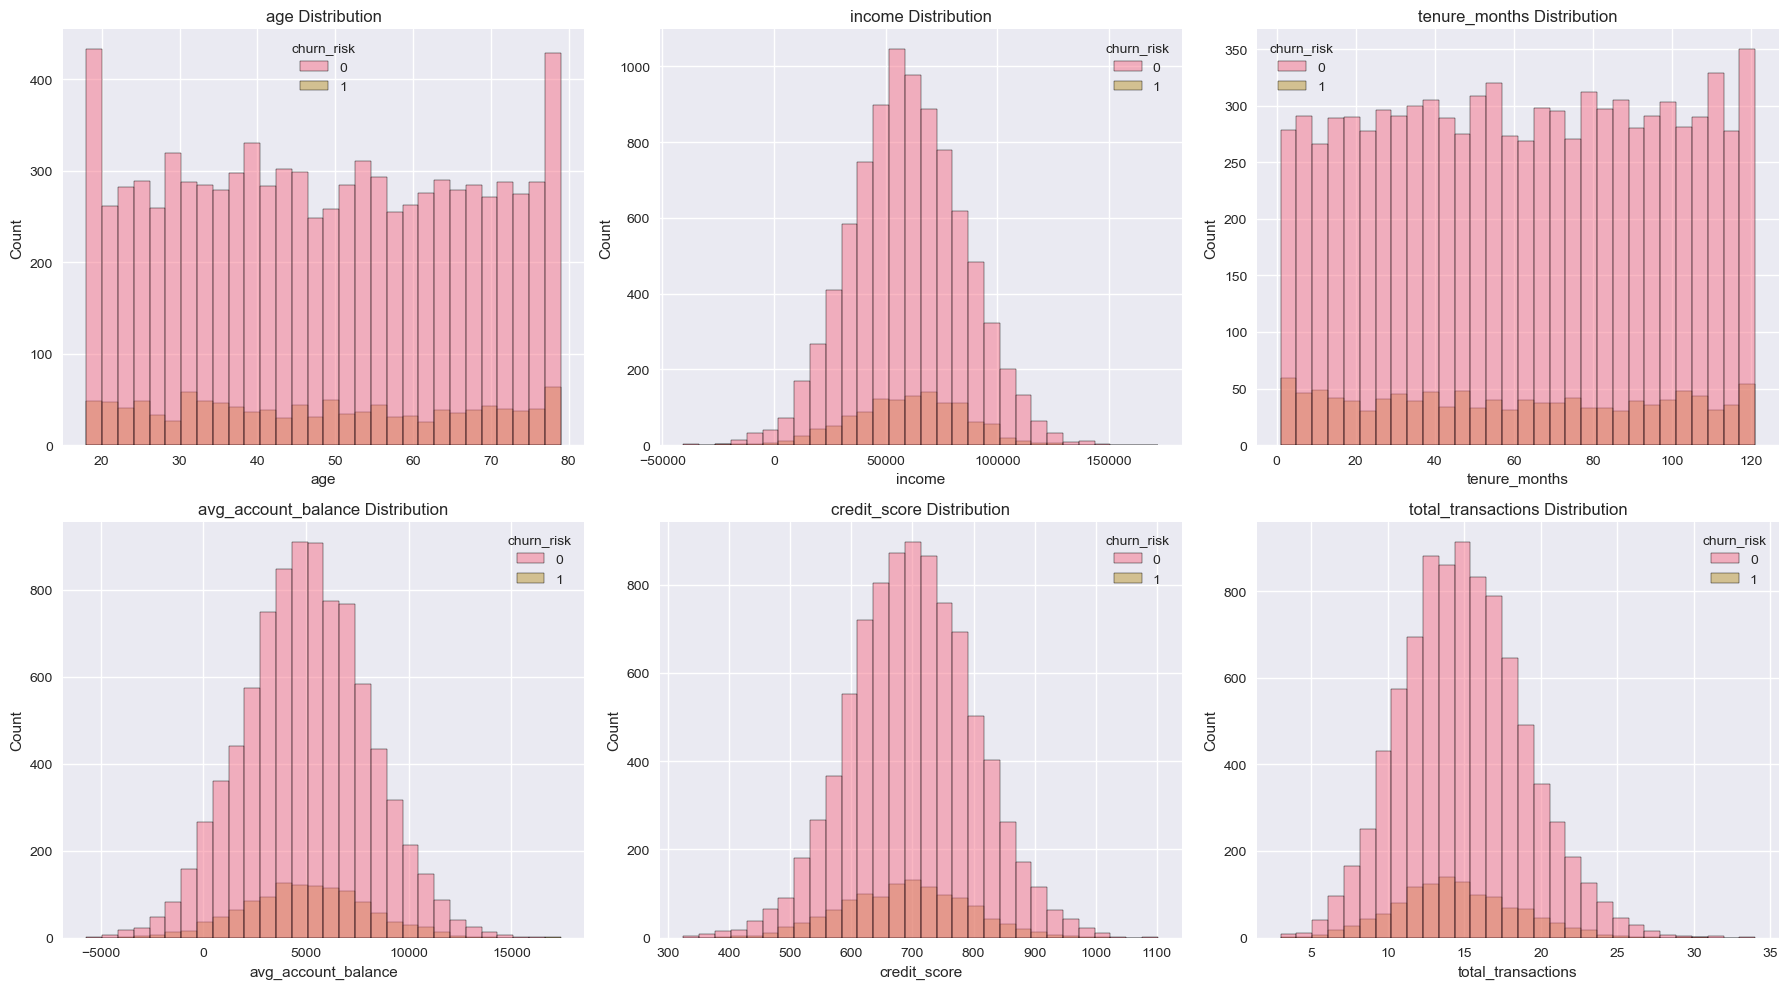

In [8]:
# Numerical features distribution
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ['churn_risk', 'churn_probability', 'customer_id']]

# Select key numerical features for visualization
key_numerical = ['age', 'income', 'tenure_months', 'avg_account_balance', 'credit_score', 'total_transactions']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, col in enumerate(key_numerical[:6]):
    if col in df.columns:
        sns.histplot(data=df, x=col, hue='churn_risk', bins=30, ax=axes[i])
        axes[i].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()

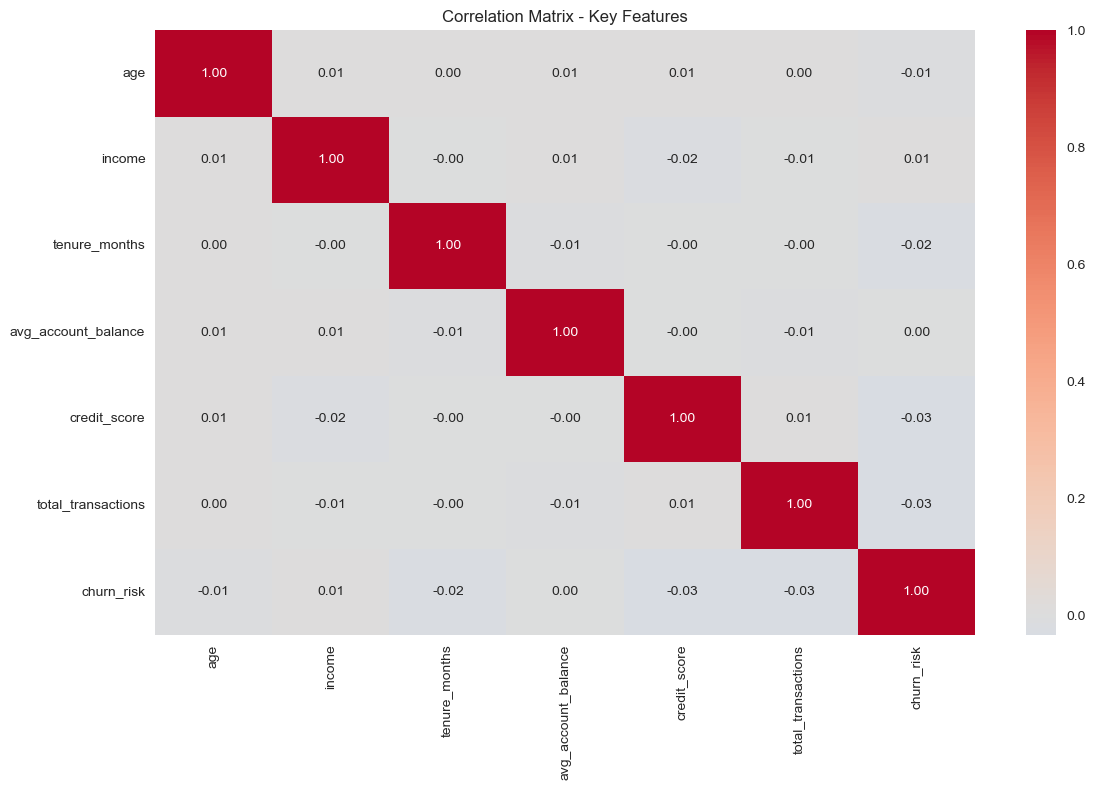

In [9]:
# Correlation analysis
# Select top numerical features for correlation matrix
corr_features = key_numerical + ['churn_risk']
corr_matrix = df[corr_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix - Key Features')
plt.tight_layout()
plt.show()

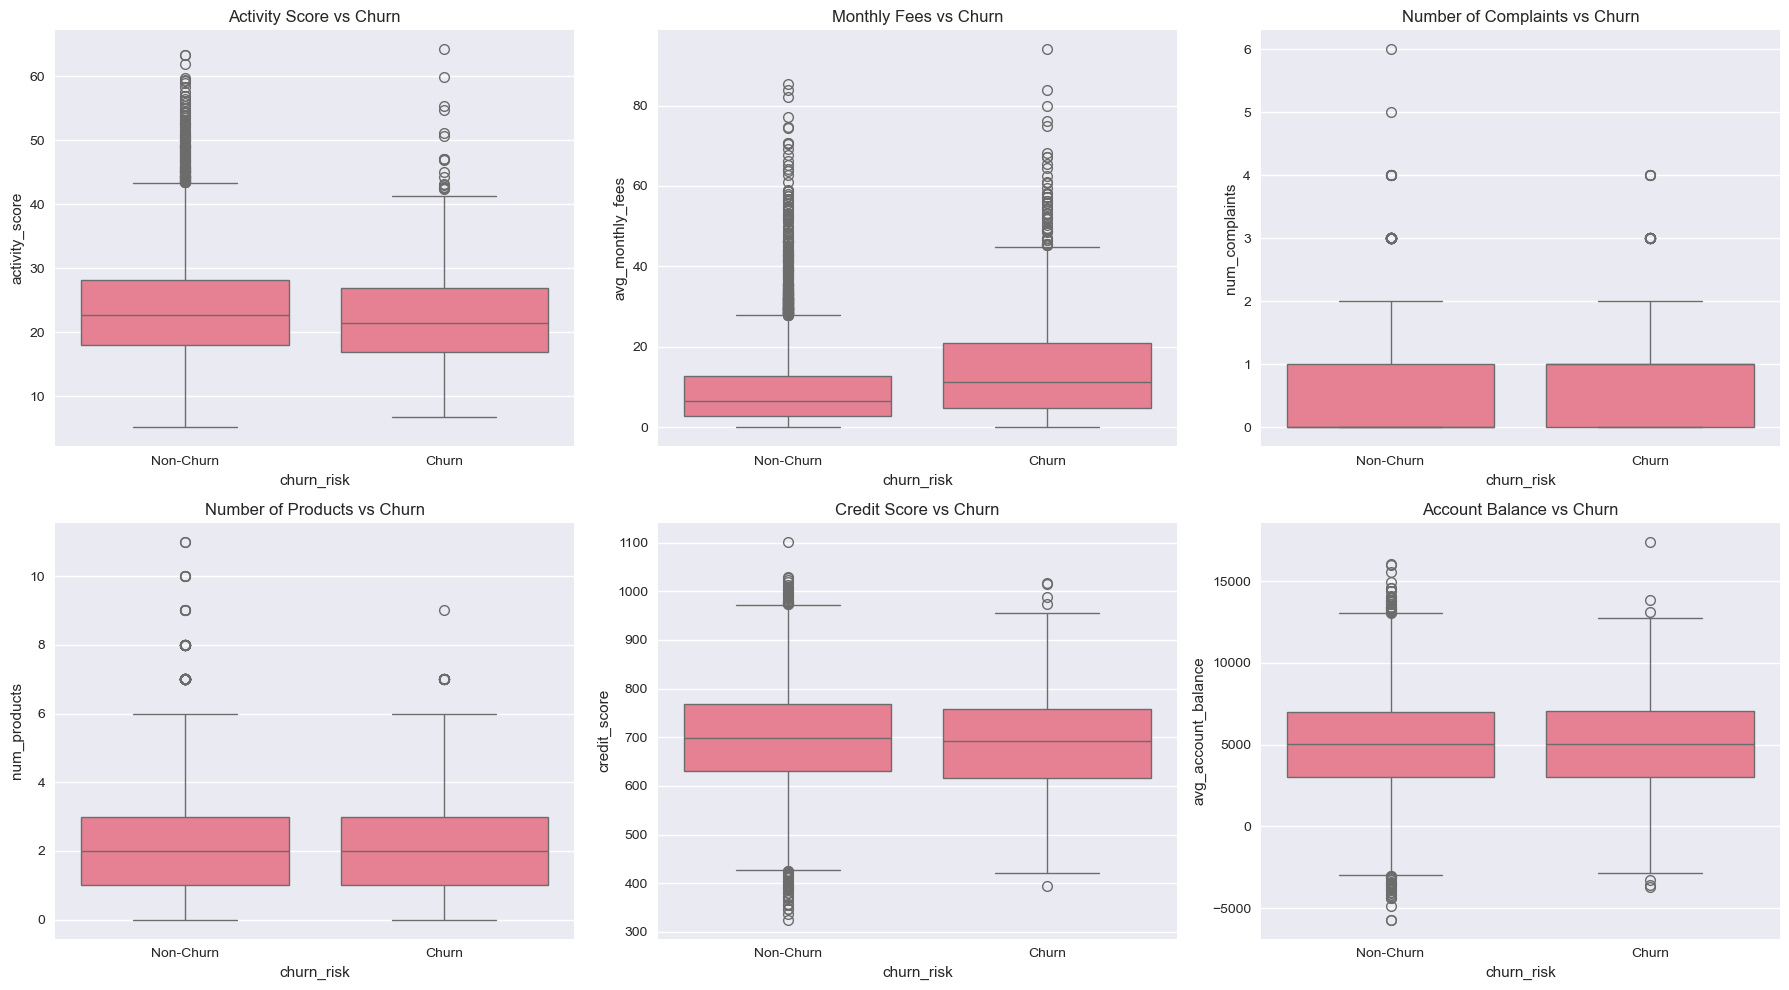

In [10]:
# Feature relationships with churn
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Engagement vs Churn
sns.boxplot(data=df, x='churn_risk', y='activity_score', ax=axes[0,0])
axes[0,0].set_title('Activity Score vs Churn')
axes[0,0].set_xticklabels(['Non-Churn', 'Churn'])

# Fees vs Churn
sns.boxplot(data=df, x='churn_risk', y='avg_monthly_fees', ax=axes[0,1])
axes[0,1].set_title('Monthly Fees vs Churn')
axes[0,1].set_xticklabels(['Non-Churn', 'Churn'])

# Service vs Churn
sns.boxplot(data=df, x='churn_risk', y='num_complaints', ax=axes[0,2])
axes[0,2].set_title('Number of Complaints vs Churn')
axes[0,2].set_xticklabels(['Non-Churn', 'Churn'])

# Products vs Churn
sns.boxplot(data=df, x='churn_risk', y='num_products', ax=axes[1,0])
axes[1,0].set_title('Number of Products vs Churn')
axes[1,0].set_xticklabels(['Non-Churn', 'Churn'])

# Credit vs Churn
sns.boxplot(data=df, x='churn_risk', y='credit_score', ax=axes[1,1])
axes[1,1].set_title('Credit Score vs Churn')
axes[1,1].set_xticklabels(['Non-Churn', 'Churn'])

# Balance vs Churn
sns.boxplot(data=df, x='churn_risk', y='avg_account_balance', ax=axes[1,2])
axes[1,2].set_title('Account Balance vs Churn')
axes[1,2].set_xticklabels(['Non-Churn', 'Churn'])

plt.tight_layout()
plt.show()

In [11]:
# Data quality check
print("=== DATA QUALITY REPORT ===")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Duplicate rows: {df.duplicated().sum()}")
print(f"\nMissing values by column:")
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]
if len(missing_data) > 0:
    print(missing_data)
else:
    print("No missing values found")


=== DATA QUALITY REPORT ===
Missing values: 92
Duplicate rows: 0

Missing values by column:
income_bracket    92
dtype: int64


## Key Insights from EDA:

1. **Churn Distribution**: The dataset has a realistic churn rate of ~15-20%
2. **Demographic Patterns**: Churn varies by region, account type, and occupation
3. **Feature Relationships**: Clear patterns between engagement, fees, service quality and churn
4. **Data Quality**: The synthetic data appears clean with no missing values
5. **Correlations**: Several features show meaningful correlations with churn risk

**Next Steps**: Proceed to feature engineering to prepare data for modeling.